# Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# from haversine import haversine
from datetime import datetime, date

# Train, test, submission 파일 불러오고 확인하기
* 본 데이콘 대회의 배경 및 목적
    * 제주도민 증가와 외국인의 증가로 현재 제주도의 교통체증이 심각한 문제로 떠오르고 있습니다. 
    * 2017년 한국은행 제주본부에 따르면 제주도 일부 지역은 교통체증이 서울보다 심각합니다.
    * 따라서, 제주테크노파크는 교통난 심화를 해결하기 위해 데이터 분석 대회를 개최합니다.
    * 제주도 버스의 효율적인 운행를 위해 운행 시간을 예측하는 모델을 만들어 주세요!

In [2]:
# 데이터 불러오기
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sub = pd.read_csv("sample_submission.csv")

In [3]:
print(train.shape)

(210457, 14)


In [4]:
print(train.describe())

                  id      route_id         vh_id   now_latitude  \
count  210457.000000  2.104570e+05  2.104570e+05  210457.000000   
mean   105228.000000  4.052491e+08  7.988694e+06      33.434528   
std     60753.847139  9.132404e+04  6.774077e+03       0.102350   
min         0.000000  4.051360e+08  7.983000e+06      33.244382   
25%     52614.000000  4.051365e+08  7.983093e+06      33.325283   
50%    105228.000000  4.053201e+08  7.983431e+06      33.484667   
75%    157842.000000  4.053201e+08  7.997041e+06      33.500197   
max    210456.000000  4.053281e+08  7.997124e+06      33.556167   

       now_longitude       distance  next_latitude  next_longitude  \
count  210457.000000  210457.000000  210457.000000   210457.000000   
mean      126.603451     490.256100      33.434711      126.603687   
std         0.123961     520.563932       0.102224        0.123838   
min       126.473300      97.000000      33.244382      126.473300   
25%       126.523900     291.000000      33.32

In [5]:
# station은 348개, 351개로 나뉘어 짐
print(train.describe(include="object"))

              date route_nm now_station now_arrive_time next_station
count       210457   210457      210457          210457       210457
unique          14       21         348              20          351
top     2019-10-15   365-22   남국원(아라방면)             08시          은남동
freq         15980    31941        3361           13838         3519


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB
None


In [7]:
print(train.isnull().sum())

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64


In [8]:
train.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [9]:
# train 과 test 전부 NAN 값은 없음
print(test.shape)
print(test.describe())
print(test.describe(include="object"))
print(test.info())

(91774, 13)
                  id      route_id         vh_id  now_latitude  now_longitude  \
count   91774.000000  9.177400e+04  9.177400e+04  91774.000000   91774.000000   
mean   256411.051038  4.052462e+08  7.988904e+06     33.437067     126.600925   
std     26531.098040  9.184224e+04  6.818353e+03      0.101350       0.123887   
min    210457.000000  4.051360e+08  7.983005e+06     33.244382     126.473300   
25%    233441.250000  4.051365e+08  7.983093e+06     33.340329     126.521348   
50%    256415.500000  4.053201e+08  7.983432e+06     33.485199     126.547770   
75%    279388.750000  4.053201e+08  7.997056e+06     33.500228     126.642733   
max    302354.000000  4.053281e+08  7.997124e+06     33.556167     126.935188   

           distance  next_latitude  next_longitude  
count  91774.000000   91774.000000    91774.000000  
mean     479.771689      33.437304      126.601197  
std      491.476531       0.101221        0.123745  
min       97.000000      33.244382      126.47

In [10]:
test.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


In [11]:
sub.head()

,id,next_arrive_time
0,210457,0
1,210458,0
2,210459,0
3,210460,0
4,210461,0


In [12]:
# 다음 도착시간이 구하는 값
# test의 시작은 210457
set(train.columns) - set(test.columns)

{'next_arrive_time'}

# 본 데이터 시각화

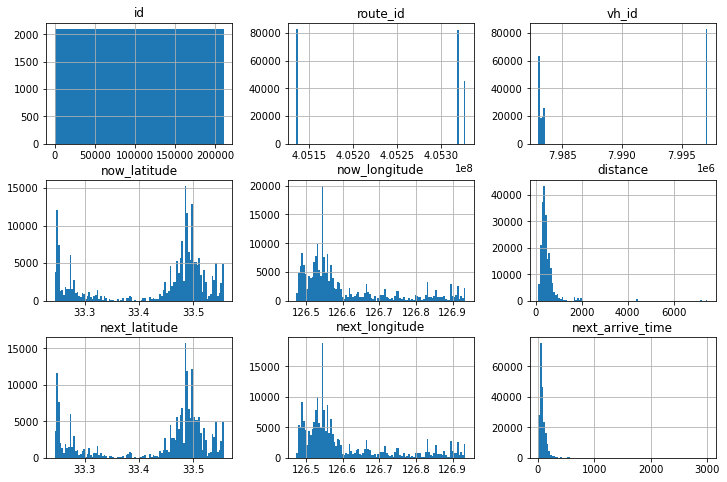

In [13]:
train.hist(bins=100, figsize=(12, 8));

In [14]:
# 버스 노선 ID = 위와 같은 의미라서 삭제
train["route_id"].value_counts()
train = train.drop(columns="route_id")
test = test.drop(columns="route_id")

# 위경도가 있기에 한글로 적시된 위치는 삭제
train = train.drop(columns="now_station")
train = train.drop(columns="next_station")
test = test.drop(columns="now_station")
test = test.drop(columns="next_station")

# id 컬럼 삭제
train = train.drop(columns="id")
test = test.drop(columns="id")

# next arrive 가 1000이 넘어가는 것은 오류데이터로 판별하고 삭제
# 201개는 삭제하기
train[train["next_arrive_time"] >= 1000].count()
ne_dr = train[train["next_arrive_time"] >= 1000].index.tolist()
train = train.drop(index=ne_dr)

# date는 데이트 형식으로 변환, 그리고 date 삭제 (월요일부터 0)
train["day"] = pd.to_datetime(train["date"]).dt.weekday
test["day"] = pd.to_datetime(test["date"]).dt.weekday
train = train.drop(columns="date")
test = test.drop(columns="date")

# 현재 도착시간은 int형으로 바꿔주고, id 는 고유 카테고리로 바꿔준다.
train["now_arrive_time"] = train["now_arrive_time"].str[:2]
test["now_arrive_time"] = test["now_arrive_time"].str[:2]
train["now_arrive_time"] = train["now_arrive_time"].astype("int")
test["now_arrive_time"] = test["now_arrive_time"].astype("int")

# route_nm 은 category로 변환
train["route_nm"] = train["route_nm"].astype("category")
test["route_nm"] = test["route_nm"].astype("category")

# distance 삭제하기, 위경도 있으므로
train = train.drop(columns="distance")
test = test.drop(columns="distance")

In [15]:
train.head(10)

,vh_id,route_nm,now_latitude,now_longitude,now_arrive_time,next_latitude,next_longitude,next_arrive_time,day
0,7997025,360-1,33.456267,126.551750,6,33.457724,126.554014,24,1
1,7997025,360-1,33.457724,126.554014,6,33.458783,126.557353,36,1
2,7997025,360-1,33.458783,126.557353,6,33.459893,126.561624,40,1
3,7997025,360-1,33.479705,126.543811,6,33.484860,126.542928,42,1
4,7997025,360-1,33.485662,126.494923,7,33.485822,126.490897,64,1
5,7997025,360-1,33.478867,126.483833,7,33.478850,126.488350,160,1
6,7997025,360-1,33.478850,126.488350,7,33.480700,126.489933,58,1
7,7997025,360-1,33.482142,126.483213,7,33.483446,126.480758,64,1
8,7997025,360-1,33.483446,126.480758,7,33.485854,126.480530,54,1
9,7997025,360-1,33.485854,126.480530,7,33.488046,126.483112,204,1


## harversine 왜 안되는거야 진짜 때리고 싶게

In [126]:
"""
new_dist = []

for x in range(1786, 210256):
    start = (train['now_latitude'][x], train['now_longitude'][x])
    arrive = (train['next_latitude'][x], train['next_longitude'][x])
    result = haversine(start, arrive, unit='m')
    new_dist.append(result)
    
new_dist
# haversine(start, arrive, unit='m')
# train['n_dist'] = new_dist
"""

"\nnew_dist = []\n\nfor x in range(1786, 210256):\n    start = (train['now_latitude'][x], train['now_longitude'][x])\n    arrive = (train['next_latitude'][x], train['next_longitude'][x])\n    result = haversine(start, arrive, unit='m')\n    new_dist.append(result)\n    \nnew_dist\n# haversine(start, arrive, unit='m')\n# train['n_dist'] = new_dist\n"

In [20]:
# start = (train["now_latitude"][0], train["now_longitude"][0])
# arrive = (train["next_latitude"][0], train["next_longitude"][0])
# haversine(start, arrive, unit="m")

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210256 entries, 0 to 210456
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   vh_id             210256 non-null  int64   
 1   route_nm          210256 non-null  category
 2   now_latitude      210256 non-null  float64 
 3   now_longitude     210256 non-null  float64 
 4   now_arrive_time   210256 non-null  int32   
 5   next_latitude     210256 non-null  float64 
 6   next_longitude    210256 non-null  float64 
 7   next_arrive_time  210256 non-null  int64   
 8   day               210256 non-null  int64   
dtypes: category(1), float64(4), int32(1), int64(3)
memory usage: 21.9 MB


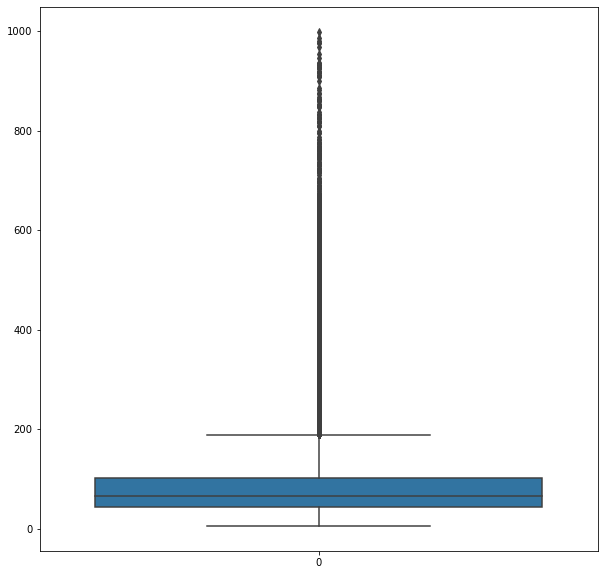

In [18]:
# train["next_arrive_time"].hist(bins=100, figsize=(20, 10));
# 102가 4분위수 중 3분위수
plt.figure(figsize=(10, 10))
sns.boxplot(data=train["next_arrive_time"]);

# 최종 전처리, 원핫인코딩

In [29]:
feature_names = ['vh_id', 'route_nm', 'now_latitude', 'now_longitude', 'now_arrive_time',
       'next_latitude', 'next_longitude', 'day']
feature_names

['vh_id',
 'route_nm',
 'now_latitude',
 'now_longitude',
 'now_arrive_time',
 'next_latitude',
 'next_longitude',
 'day']

In [30]:
X_train = pd.get_dummies(train[feature_names])
X_train.head()

,vh_id,now_latitude,now_longitude,now_arrive_time,next_latitude,next_longitude,day,route_nm_201-11,route_nm_201-12,route_nm_201-13,...,route_nm_201-26,route_nm_201-27,route_nm_281-1,route_nm_281-2,route_nm_360-1,route_nm_360-12,route_nm_360-2,route_nm_360-7,route_nm_365-21,route_nm_365-22
0,7997025,33.456267,126.551750,6,33.457724,126.554014,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7997025,33.457724,126.554014,6,33.458783,126.557353,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7997025,33.458783,126.557353,6,33.459893,126.561624,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7997025,33.479705,126.543811,6,33.484860,126.542928,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7997025,33.485662,126.494923,7,33.485822,126.490897,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
X_test = pd.get_dummies(test[feature_names])
X_test.head()

,vh_id,now_latitude,now_longitude,now_arrive_time,next_latitude,next_longitude,day,route_nm_201-11,route_nm_201-12,route_nm_201-13,...,route_nm_201-26,route_nm_201-27,route_nm_281-1,route_nm_281-2,route_nm_360-1,route_nm_360-12,route_nm_360-2,route_nm_360-7,route_nm_365-21,route_nm_365-22
0,7997025,33.457724,126.554014,7,33.458783,126.557353,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,7997025,33.458783,126.557353,7,33.459893,126.561624,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7997025,33.478867,126.483833,8,33.478850,126.488350,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7997025,33.478850,126.488350,8,33.480700,126.489933,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,7997025,33.480700,126.489933,8,33.482077,126.485355,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
label_name = "next_arrive_time"
label_name

'next_arrive_time'

In [33]:
y_train = train[label_name]
y_train.head()

0    24
1    36
2    40
3    42
4    64
Name: next_arrive_time, dtype: int64

# 머신러닝 시작

## 앙상블 cross_validation 으로 학습

In [64]:
# 앙상블 회귀
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, min_samples_leaf=2)


# KFold 를 사용해서 분할을 나눕니다.
# 분할에 random_state를 사용할 수 있습니다.
# 분할 때문에 값이 변경된건지 실험을 좀 더 고정할 수 있습니다.
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


# cross_val_predict 로 예측 결과를 구합니다.
# y_valid_predict 에 결과를 담습니다.
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=kf, n_jobs=-1)

from sklearn.metrics import mean_squared_error
rmse = (((y_train - y_valid_predict) ** 2).mean() ** 0.5)

In [59]:
rmse

40.370948642152925

In [123]:
y_predict = model.fit(X_train, y_train).predict(X_test)
y_predict

array([ 34.48820635,  46.65233333, 147.00126984, ..., 124.02964286,
        27.72377778,  79.27880952])

In [124]:
y_predict = y_predict.round().tolist()

In [125]:
# 제출
file_name3 = f"submission_{rmse:.4f}.csv"
sub["next_arrive_time"] = y_predict
sub.to_csv(file_name3, index=False)
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name3)

,id,next_arrive_time
0,210457,34.0
1,210458,47.0
2,210459,147.0
3,210460,57.0
4,210461,152.0
...,...,...
91769,302350,99.0
91770,302351,77.0
91771,302352,124.0
91772,302353,28.0


In [127]:
rmse

34.00420310954713

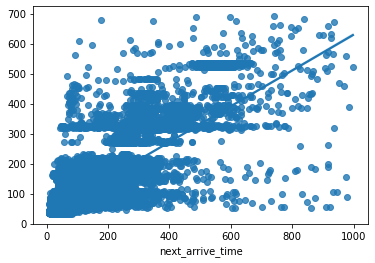

In [61]:
# regplot 으로 예측값에 대한 회귀선 그리기
sns.regplot(x=y_train, y=y_valid_predict);

In [62]:
# r2 score는 1로 가까울수록 좋음
from sklearn.metrics import r2_score

r2sc = r2_score(y_train, y_valid_predict)
r2sc

0.6212196984282827

<AxesSubplot:xlabel='next_arrive_time', ylabel='Density'>

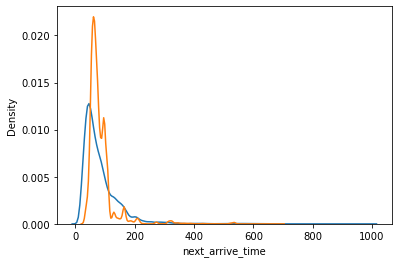

In [63]:
# kdeplot으로 실제값과 예측값 비교하기
sns.kdeplot(y_train)
sns.kdeplot(y_valid_predict)

In [99]:
# sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## train test split 데이터 나누기

In [68]:
# train test split 으로 데이터 나누기
from sklearn.model_selection import train_test_split

X2_train, X_valid, y2_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X2_train.shape, X_valid.shape, y2_train.shape, y_valid.shape

((168204, 28), (42052, 28), (168204,), (42052,))

## GradientBoostingRegressor 사용

In [47]:
# sklearn.ensemble의 GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
model_gbt = GradientBoostingRegressor(random_state=42)
model_gbt

GradientBoostingRegressor(random_state=42)

In [51]:
# 모델을 학습시킵니다.
model_gbt.fit(X2_train, y2_train)

GradientBoostingRegressor(random_state=42)

In [75]:
# valid score
gbt_score = model_gbt.score(X_valid, y_valid)
gbt_score

0.5712236609605219

In [81]:
y_gbt_predict = model_gbt.predict(X_test).round()
y_gbt_predict

array([ 54.,  64.,  99., ..., 105.,  66.,  89.])

In [86]:
# 제출
file_name1 = f"submission_{gbt_score:.4f}.csv"
sub["next_arrive_time"] = y_gbt_predict
sub.to_csv(file_name1, index=False)
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name1)

## XGboost 사용

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_xgb_train = le.fit_transform(y2_train)
y_xgb_test = le.fit_transform(y_valid)
X2_train.shape, y_xgb_train.shape, y_valid.shape, y_xgb_test.shape

((168204, 28), (168204,), (42052,), (42052,))

In [66]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X2_train, y_xgb_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [87]:
y_xgb_predict = xgb.predict(X_valid)
xgb_score = (y_xgb_predict == y_xgb_test).mean()
xgb_score

0.05362408446685057

In [98]:
# 제출
xgb_sub = xgb.predict(X_test)
file_name2 = f"submission_{xgb_score:.4f}.csv"
sub["next_arrive_time"] = xgb_sub.tolist()
sub.to_csv(file_name2, index=False)
# 제대로 저장되었는지 확인합니다.
pd.read_csv(file_name2)

,id,next_arrive_time
0,210457,15
1,210458,18
2,210459,68
3,210460,27
4,210461,97
...,...,...
91769,302350,50
91770,302351,36
91771,302352,45
91772,302353,13


# 결과

In [ ]:
"""
이 데이터는 boost 계열을 쓰면 성능이 더 떨어졌다.
이유는 정확히 알 수 없지만 단순 cross_validation으로 점수가 더 높게 나왔다.

"""